In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
import scipy
import matplotlib.dates as mdates
from datetime import datetime
sys.path.append('..')
from read_data_functions import *
from plot_functions import *
from calculations import *

In [22]:
parent_path = '../../../../'
path = 'L:/PG-Nanoteknologi/PROJEKTER/2024 Laura og Nan/Lund/'

NanoScan = read_SMPS(path, parent_path, 0)
OPS = read_OPS(path, parent_path, ',')

In [44]:
display(OPS['Exp1'])

,Elapsed Time [s],Bin 1,Bin 2,Bin 3,Bin 4,Bin 5,Bin 6,Bin 7,Bin 8,Bin 9,...,Bin 15,Bin 16,Bin 17,Deadtime (s),Temperature (C),Humidity (%),Ambient Pressure (kPa),Unnamed: 24,Time,Total Conc
0,60,2067,559,229,81,72,53,27,36,34,...,4,3,14,0.027971,27.553,0.0,102.027,NaN,2024-10-16 09:29:40,3234
1,120,1943,618,195,92,60,49,32,29,24,...,3,3,16,0.027269,27.561,0.0,102.024,NaN,2024-10-16 09:30:40,3125
2,180,2002,562,245,96,46,51,21,19,25,...,3,2,10,0.028621,27.577,0.0,102.028,NaN,2024-10-16 09:31:40,3132
3,240,2054,583,198,81,61,41,21,36,24,...,4,6,11,0.025544,27.636,0.0,102.030,NaN,2024-10-16 09:32:40,3168
4,300,1990,572,188,87,65,44,23,27,17,...,4,5,6,0.024516,27.712,0.0,102.042,NaN,2024-10-16 09:33:40,3066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,11640,206,514,359,126,90,80,45,23,20,...,0,0,0,0.016963,36.489,0.0,102.143,NaN,2024-10-16 12:42:40,1483
194,11700,208,412,288,96,81,80,24,21,25,...,0,0,0,0.013574,36.490,0.0,102.141,NaN,2024-10-16 12:43:40,1257
195,11760,201,345,265,103,77,74,22,27,24,...,3,0,1,0.012279,36.490,0.0,102.142,NaN,2024-10-16 12:44:40,1155
196,11820,201,277,183,74,56,52,20,18,13,...,2,0,2,0.010250,36.490,0.0,102.141,NaN,2024-10-16 12:45:40,912


In [41]:
def OPS_single_timeseries(ax, df, colors):
    
    ax.plot(df['Time'], df['Total Conc'], label = 'Total', zorder = 10, color = colors[0], lw = 1)

    for i, key in enumerate(df.keys()[1:18]):
        ax.plot(df['Time'], df[key], label = key, color = colors[i+1], lw = 1)

    # Set the x-axis major formatter to a date format
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
    # Set the locator for the x-axis (optional, depending on how you want to space the ticks)
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    # Rotate and format date labels
    plt.setp(ax.xaxis.get_majorticklabels(), size = 8)

    ax.set_xlabel('Time [HH:MM]', fontsize = 9)
    ax.set_ylabel('Concentration / #/cm$^{3}$', fontsize = 9)

    ax.legend(frameon = False, fontsize = 8, ncol = 2)

In [37]:
colors = ['k', 'tab:blue', 'tab:orange', 'tab:green', 'red', 'tab:purple', 'tab:brown', 
              'tab:pink', 'magenta', 'tab:olive', 'tab:cyan', 'navy', 'aquamarine', 'darkolivegreen',
              'darkred', 'darkmagenta', 'chocolate', 'gold']

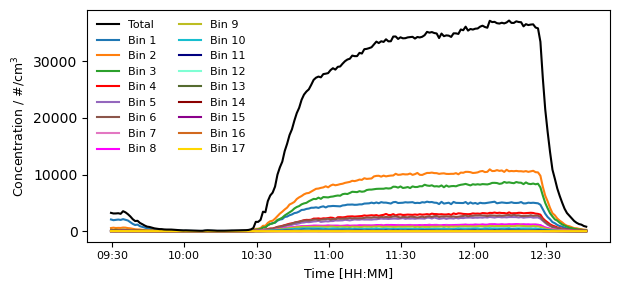

In [42]:
fig, ax = plt.subplots(figsize = (6.3, 3))

OPS_single_timeseries(ax, OPS['Exp1'], colors)

fig.tight_layout()
fig.savefig('OPS_total_exp1.png', dpi = 600)
plt.show()

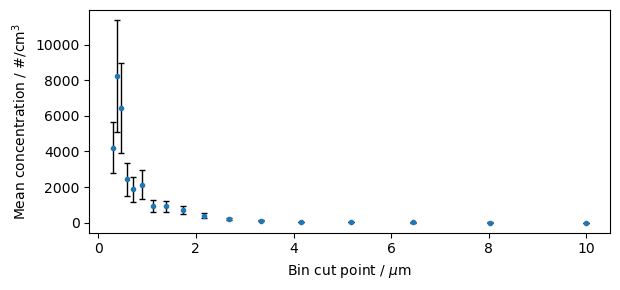

In [53]:
bin_cut_point = [0.300, 0.374, 0.465, 0.579, 0.721, 0.897, 1.117, 1.391, 1.732, 2.156, 2.685, 3.343, 4.162, 5.182, 6.451, 8.031, 10.000]

start_time = pd.to_datetime('2024-10-16 10:26:00')
end_time = pd.to_datetime('2024-10-16 12:26:00')

time = pd.to_datetime(OPS['Exp1']['Time']).round('60s')
time_filter = (time >= start_time) & (time <= end_time)
filtered_time = time[time_filter]

mean = []
std = []
for key in OPS['Exp1'].keys()[1:18]:
    conc = np.array(OPS['Exp1'][key])
    filtered_conc = conc[time_filter]
    bin_mean = filtered_conc.mean()
    bin_std = filtered_conc.std()
    mean.append(bin_mean)
    std.append(bin_std)

fig, ax = plt.subplots(figsize = (6.3, 3))

ax.errorbar(bin_cut_point, mean, std, fmt='.', ecolor='k', elinewidth=1, capsize=2, capthick=1)

ax.set(xlabel='Bin cut point / $\mu$m', ylabel='Mean concentration / #/cm$^{3}$')

fig.tight_layout()
fig.savefig('OPS_mean_exp1.png', dpi = 600)
plt.show()


In [32]:
def NanoScan_single_timeseries(ax, df, ncol):
    
    # ax.plot(df['Time'], df['Total Conc'], label = 'Total', zorder = 10)

    for key in df.keys()[3:16]:
        ax.plot(df['Time'], df[key], label = key + ' nm', lw = 1)

    # Set the x-axis major formatter to a date format
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
    # Set the locator for the x-axis (optional, depending on how you want to space the ticks)
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    # Rotate and format date labels
    plt.setp(ax.xaxis.get_majorticklabels(), size = 8)

    ax.set_xlabel('Time [HH:MM]', fontsize = 9)
    ax.set_ylabel('Concentration / #/cm$^{3}$', fontsize = 9)

    ax.legend(frameon = False, fontsize = 8, ncol = ncol)

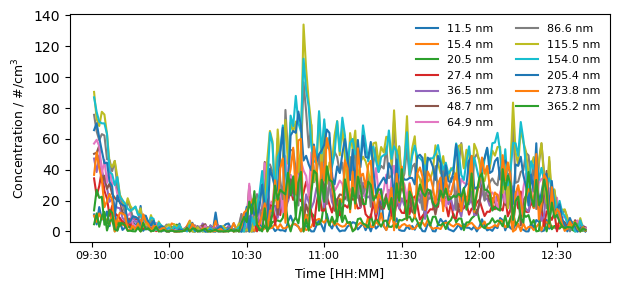

In [33]:
fig, ax = plt.subplots(figsize = (6.3, 3))

NanoScan_single_timeseries(ax, NanoScan['2024-10-16'], 2)

fig.tight_layout()
fig.savefig('NanoScan_total_exp1.png', dpi = 600)
plt.show()

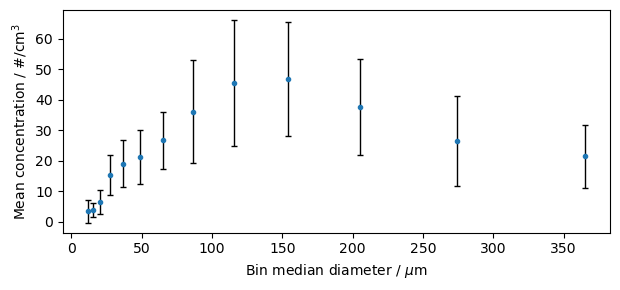

In [56]:
bin_mean_diameter = []

start_time = pd.to_datetime('2024-10-16 10:26:00')
end_time = pd.to_datetime('2024-10-16 12:26:00')

time = pd.to_datetime(NanoScan['2024-10-16']['Time']).round('60s')
time_filter = (time >= start_time) & (time <= end_time)
filtered_time = time[time_filter]

mean = []
std = []
for key in NanoScan['2024-10-16'].keys()[3:16]:
    bin_mean_diameter.append(float(key))
    conc = np.array(NanoScan['2024-10-16'][key])
    filtered_conc = conc[time_filter]
    bin_mean = filtered_conc.mean()
    bin_std = filtered_conc.std()
    mean.append(bin_mean)
    std.append(bin_std)

fig, ax = plt.subplots(figsize = (6.3, 3))

ax.errorbar(bin_mean_diameter, mean, std, fmt='.', ecolor='k', elinewidth=1, capsize=2, capthick=1)

ax.set(xlabel='Bin median diameter / $\mu$m', ylabel='Mean concentration / #/cm$^{3}$')

fig.tight_layout()
fig.savefig('NanoScan_mean_exp1.png', dpi = 600)
plt.show()